<a href="https://colab.research.google.com/github/JanaBasha/Employee-Dataset/blob/main/JanaBashaSQLMLTaskipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SQL

In [3]:
import pandas as pd
import sqlite3

In [4]:
employee_master=pd.read_csv("Employee_Master.csv")
employee_exit=pd.read_csv("Employee_Exit.csv")
employee_performance=pd.read_csv("Employee_Performance.csv")
bonus=pd.read_csv("Performance_Bonus.csv")

In [5]:
employee_master['Annual Salary']=employee_master['Annual Salary'].replace(r'[\$,]','', regex=True).astype(float)
employee_master['Bonus %']=employee_master['Bonus %'].replace(r'[%]','', regex=True).astype(float)
employee_master["Hire Date"]=pd.to_datetime(employee_master["Hire Date"],format='mixed')
employee_master["Exit Date"]=pd.to_datetime(employee_master["Exit Date"],format='mixed')
employee_exit['Annual Salary']=employee_exit['Annual Salary'].replace(r'[\$,]','', regex=True).astype(float)
employee_exit['Bonus %']=employee_exit['Bonus %'].replace(r'[%]','', regex=True).astype(float)
employee_exit["Hire Date"]=pd.to_datetime(employee_exit["Hire Date"],format='mixed')
employee_exit["Exit Date"]=pd.to_datetime(employee_exit["Exit Date"],format='mixed')

In [6]:
conn=sqlite3.connect(":memory:")
employee_master.to_sql("employees_master", conn, index=False, if_exists="replace")
employee_performance.to_sql("employees_performance", conn, index=False, if_exists="replace")
employee_exit.to_sql("employees_exit", conn, index=False, if_exists="replace")
bonus.to_sql("bonus", conn, index=False, if_exists="replace")

1000

In [7]:
pd.read_sql_query('SELECT COUNT(*) AS Rows FROM employees_master;', conn)

,Rows
0,1000


In [8]:
pd.read_sql_query('SELECT * FROM employees_master;', conn)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08 00:00:00,141604.0,0.15,United States,Seattle,2021-10-16 00:00:00
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29 00:00:00,99975.0,0.00,China,Chongqing,None
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26 00:00:00,163099.0,0.20,United States,Chicago,None
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27 00:00:00,84913.0,0.07,United States,Chicago,None
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20 00:00:00,95409.0,0.00,United States,Phoenix,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33.0,2016-09-18 00:00:00,98427.0,0.00,United States,Columbus,None
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,female,Asian,44.0,2010-05-31 00:00:00,47387.0,0.00,China,Chengdu,2018-01-08 00:00:00
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31.0,2019-06-10 00:00:00,176710.0,0.15,United States,Miami,None
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33.0,2012-01-28 00:00:00,95960.0,0.00,China,Chengdu,None


In [9]:
pd.read_sql_query('SELECT Department, COUNT(*) AS count FROM employees_master GROUP BY Department;', conn)

,Department,count
0,None,2
1,Accounting,96
2,Engineering,158
3,Finance,120
4,Human Resources,124
5,IT,240
6,Marketing,120
7,Sales,140


In [10]:
pd.read_sql_query('SELECT COUNT(*) AS null_exit_dates FROM employees_master WHERE "Exit Date" IS NULL', conn)

,null_exit_dates
0,915


In [11]:
pd.read_sql_query('SELECT Department, AVG("Annual Salary") AS "Average Salary" FROM employees_master GROUP BY Department ORDER BY "Average Salary";', conn)

,Department,Average Salary
0,None,66902.500000
1,IT,97959.759494
2,Engineering,109377.415584
3,Sales,111225.338129
4,Human Resources,118256.926230
5,Accounting,123146.947917
6,Finance,123208.361345
7,Marketing,129663.033333


In [12]:
newtablequery="CREATE TABLE Employee_Profile AS SELECT em.EEID, em.[Full Name], em.[Job Title], em.Department, em.[Business Unit], em.Gender, em.Ethnicity, em.Age, em.[Hire Date], em.[Annual Salary], em.[Bonus %], em.Country, em.City, em.[Exit Date], ep.EmploymentRating, ep.DaysOfAbsence, ep.EducationLevel, ep.CertificationsEarned FROM employees_master em JOIN employees_performance ep ON em.EEID = ep.EEID;"
conn.execute(newtablequery)

In [13]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,employees_master
1,employees_performance
2,employees_exit
3,bonus
4,Employee_Profile


In [14]:
employeeprofileDF=pd.read_sql_query("SELECT * FROM Employee_Profile;", conn)

In [15]:
employeeprofileDF.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08 00:00:00,141604.0,0.15,United States,Seattle,2021-10-16 00:00:00,5,2,Master's,2
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29 00:00:00,99975.0,0.00,China,Chongqing,None,10,8,Bachelor's,2
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26 00:00:00,163099.0,0.20,United States,Chicago,None,5,4,Bachelor's,2
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27 00:00:00,84913.0,0.07,United States,Chicago,None,8,3,Bachelor's,2
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20 00:00:00,95409.0,0.00,United States,Phoenix,None,5,12,Bachelor's,0


In [16]:
newrows = [
    (1, 'Jana Basha', 'Sr. Analyst', 'IT', 'Corporate', 'Female', 'Asian', 20, '2020-07-01', 95000, 12.0, 'United States', 'Miami', None, 7, 1, 'Bachelor', 2),
    (2, 'Sarah Farah', 'HR Manager', 'HR', 'Research & Development', 'Female', 'Asian', 42, '2010-03-15', 95000, 12.0, 'UAE', 'Abu Dhabi', None, 8, 2, 'Master', 3),
    (3, 'Ahmad Ali', 'Accountant', 'Finance', 'Corporate', 'Male', 'Asian', 36, '2015-08-21', 101000, 3.0, 'China', 'Shanghai', None, 9, 0, 'Bachelor', 1),
    (4, 'Tala Layla', 'Cloud Infrastructure Architect', 'IT', 'Speciality Products', 'Female', 'Asian', 37, '2019-09-01', 101000, 3.0, 'China', 'Shanghai', None, 5, 4, 'Master', 1),
    (5, 'Sanad Abdullah', 'Computer Systems Manager', 'Engineering', 'Research & Development', 'Male', 'Black', 19, '2010-11-27', 101000, 3.0, 'United States', 'Seattle', None, 6, 3, 'Diploma', 1),
    (6, 'Mona Adel', 'Data Analyst', 'IT', 'Research & Development', 'Female', 'Asian', 27, '2021-05-19', 70000, 5.0, 'Brazil', 'Sao Paulo', None, 7, 2, 'Bachelor', 2),
    (7, 'Rami Yousef', 'Legal Advisor', 'Legal', 'Corporate', 'Male', 'Asian', 40, '2012-11-30', 96000, 10.0, 'United States', 'Columbus', None, 4, 7, 'Master', 3),
    (8, 'Nada Sami', 'Recruiter', 'HR', 'Corporate', 'Female', 'Asian', 33, '2018-07-07', 72000, 6.0, 'United States', 'Florida', None, 9, 0, 'Bachelor', 1),
    (9, 'Tariq Hani', 'Financial Analyst', 'Finance', 'Corporate', 'Male', 'Asian', 31, '2016-04-22', 82000, 7.0, 'China', 'Chengdu', None, 7, 6, 'Master', 2),
    (10, 'Dina Noor', 'Graphic Designer', 'Marketing', 'Corporate', 'Female', 'Asian', 26, '2022-01-10', 60000, 4.0, 'Brazil', 'Sao Paulo', None, 8, 4, 'Bachelor', 1)
]

In [17]:
for row in newrows:
  query="INSERT INTO Employee_Profile VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);"
  conn.execute(query, row)

In [18]:
query="UPDATE Employee_Profile SET City='Abu Dhabi' WHERE City='Phoenix' AND Gender='Male' AND Department='IT';"
conn.execute(query)

In [19]:
depts="SELECT DISTINCT Department FROM Employee_Profile;"
departments=pd.read_sql_query(depts, conn)

In [20]:
for dept in departments['Department']:
    query="SELECT * FROM Employee_Profile WHERE Department = ?;"
    df=pd.read_sql_query(query, conn, params=(dept,))
    filename=f"{dept}.csv"
    df.to_csv(filename, index=False)

### ML

In [21]:
itDF=pd.read_csv("IT.csv")

In [22]:
itDF.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08 00:00:00,141604.0,0.15,United States,Seattle,2021-10-16 00:00:00,5,2,Master's,2
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29 00:00:00,99975.0,0.00,China,Chongqing,NaN,10,8,Bachelor's,2
2,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27 00:00:00,84913.0,0.07,United States,Chicago,NaN,8,3,Bachelor's,2
3,E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27.0,2020-07-01 00:00:00,119746.0,0.10,United States,Phoenix,NaN,7,13,Master's,0
4,E04116,David Barnes,NaN,IT,Corporate,Male,Caucasian,64.0,2013-11-03 00:00:00,186503.0,0.24,United States,Columbus,NaN,8,8,Bachelor's,2


In [23]:
itDF.isna().sum()

,0
EEID,0
Full Name,1
Job Title,1
Department,0
Business Unit,0
Gender,0
Ethnicity,2
Age,3
Hire Date,3
Annual Salary,3


In [24]:
itDF.drop(["Exit Date"], axis=1)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08 00:00:00,141604.0,0.15,United States,Seattle,5,2,Master's,2
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29 00:00:00,99975.0,0.00,China,Chongqing,10,8,Bachelor's,2
2,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27 00:00:00,84913.0,0.07,United States,Chicago,8,3,Bachelor's,2
3,E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27.0,2020-07-01 00:00:00,119746.0,0.10,United States,Phoenix,7,13,Master's,0
4,E04116,David Barnes,NaN,IT,Corporate,Male,Caucasian,64.0,2013-11-03 00:00:00,186503.0,0.24,United States,Columbus,8,8,Bachelor's,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,E04762,Audrey Richardson,Director,IT,Manufacturing,Female,Caucasian,46.0,2018-10-06 00:00:00,166259.0,0.17,United States,Chicago,8,15,Bachelor's,4
284,E01148,Scarlett Kumar,Systems Analyst,IT,Corporate,Female,Asian,55.0,2009-01-07 00:00:00,47032.0,0.00,United States,Columbus,9,16,Master's,2
285,1,Jana Basha,Sr. Analyst,IT,Corporate,Female,Asian,20.0,2020-07-01,95000.0,12.00,United States,Miami,7,1,Bachelor,2
286,4,Tala Layla,Cloud Infrastructure Architect,IT,Speciality Products,Female,Asian,37.0,2019-09-01,101000.0,3.00,China,Shanghai,5,4,Master,1


In [25]:
itDF["Full Name"].isna().sum()

np.int64(1)

In [26]:
itDF[itDF["Full Name"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
43,E03567,NaN,Technical Architect,IT,Research & Development,Male,Latino,51.0,2008-04-15 00:00:00,86431.0,0.0,United States,Columbus,NaN,8,3,Bachelor's,4


In [27]:
itDF['Full Name'].fillna('Unknown', inplace=True)

/tmp/ipython-input-27-1238390424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  itDF['Full Name'].fillna('Unknown', inplace=True)


In [28]:
itDF["Job Title"].value_counts()

,count
Job Title,
Computer Systems Manager,29
Vice President,25
Technical Architect,21
Network Architect,21
Solutions Architect,20
Systems Analyst,19
Enterprise Architect,19
Cloud Infrastructure Architect,19
Sr. Manger,17


In [29]:
itDF["Job Title"]=itDF["Job Title"].replace({"System Administrator\xa0": "System Administrator", "Sr. Manger": "Sr. Manager"})

In [30]:
itDF[itDF["Job Title"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
4,E04116,David Barnes,NaN,IT,Corporate,Male,Caucasian,64.0,2013-11-03 00:00:00,186503.0,0.24,United States,Columbus,NaN,8,8,Bachelor's,2


In [31]:
cond1=itDF["Business Unit"]=="Corporate"
cond2=itDF["Annual Salary"]>=180000
itDF.loc[cond1&cond2]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
4,E04116,David Barnes,NaN,IT,Corporate,Male,Caucasian,64.0,2013-11-03 00:00:00,186503.0,0.24,United States,Columbus,NaN,8,8,Bachelor's,2
7,E00304,Dylan Choi,Vice President,IT,Corporate,Male,Asian,63.0,2012-05-11 00:00:00,231141.0,0.34,China,Beijing,NaN,10,5,Master's,4
68,E03935,Cora Jiang,Vice President,IT,Corporate,Female,Asian,53.0,2008-04-30 00:00:00,182202.0,0.30,United States,Austin,NaN,10,6,Bachelor's,2
96,E03268,Everly Coleman,Vice President,IT,Corporate,Female,Caucasian,48.0,2015-02-18 00:00:00,194871.0,0.35,United States,Columbus,NaN,9,2,Bachelor's,1
97,E03268,Everly Coleman,Vice President,IT,Corporate,Female,Caucasian,48.0,2015-02-18 00:00:00,194871.0,0.35,United States,Columbus,NaN,9,6,Bachelor's,1
138,E01070,Grayson Brown,Vice President,IT,Corporate,Male,Caucasian,38.0,2016-06-22 00:00:00,249870.0,0.34,United States,Chicago,NaN,9,4,Bachelor's,2
139,E01070,Grayson Brown,Vice President,IT,Corporate,Male,Caucasian,38.0,2016-06-22 00:00:00,249870.0,0.34,United States,Chicago,NaN,10,10,Bachelor's,2


In [32]:
itDF['Job Title'].fillna('Vice President', inplace=True)

/tmp/ipython-input-32-3018828060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  itDF['Job Title'].fillna('Vice President', inplace=True)


<Axes: xlabel='Job Title'>

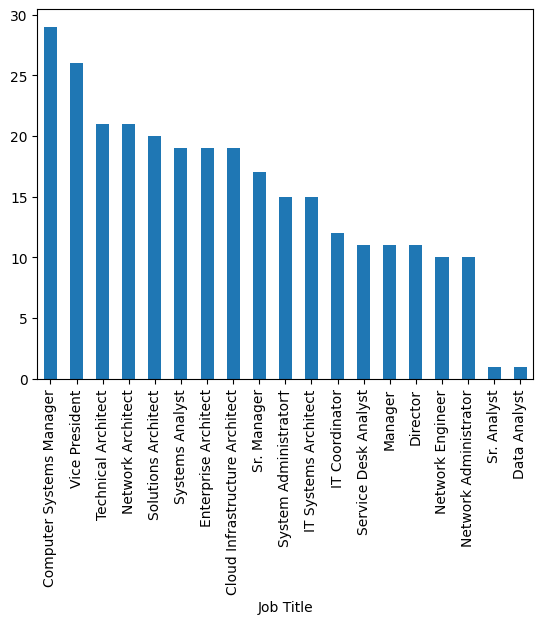

In [33]:
jobs=itDF["Job Title"].value_counts()
jobs.plot(kind="bar")

In [34]:
itDF[itDF["Ethnicity"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
48,E02855,Piper Cheng,Enterprise Architect,IT,Manufacturing,Female,NaN,NaN,NaN,NaN,NaN,United States,Miami,NaN,9,9,Bachelor's,3
49,E00816,Skylar Watson,Network Architect,IT,Speciality Products,Female,NaN,NaN,NaN,NaN,NaN,United States,Phoenix,NaN,9,10,Bachelor's,0


In [35]:
itDF["Ethnicity"].fillna("Unknown", inplace=True)

/tmp/ipython-input-35-649104837.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  itDF["Ethnicity"].fillna("Unknown", inplace=True)


In [36]:
itDF["Age"].isna().sum()

np.int64(3)

In [37]:
itDF[itDF["Age"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
13,E03538,Gabriel Holmes,Enterprise Architect,IT,Research & Development,Male,Caucasian,NaN,2010-11-04 00:00:00,92952.0,0.0,United States,Seattle,NaN,10,14,Bachelor's,0
48,E02855,Piper Cheng,Enterprise Architect,IT,Manufacturing,Female,Unknown,NaN,NaN,NaN,NaN,United States,Miami,NaN,9,9,Bachelor's,3
49,E00816,Skylar Watson,Network Architect,IT,Speciality Products,Female,Unknown,NaN,NaN,NaN,NaN,United States,Phoenix,NaN,9,10,Bachelor's,0


In [38]:
mask=(itDF["Job Title"]=="Enterprise Architect")&(itDF["Business Unit"]=="Research & Development")
avg=itDF.loc[mask, "Age"].mean()
itDF.loc[mask&itDF["Age"].isna(), "Age"]=avg

In [39]:
mask=(itDF["Job Title"]=="Enterprise Architect")&(itDF["Business Unit"]=="Manufacturing")
avg=itDF.loc[mask, "Age"].mean()
itDF.loc[mask&itDF["Age"].isna(), "Age"]=avg

In [40]:
mask=(itDF["Job Title"]=="Network Architect")&(itDF["Business Unit"]=="Speciality Products")
avg=itDF.loc[mask, "Age"].mean()
itDF.loc[mask&itDF["Age"].isna(), "Age"]=avg

In [41]:
itDF["Age"].describe()

,Age
count,288.000000
mean,43.936756
std,10.710900
min,20.000000
25%,35.000000
50%,45.000000
75%,53.000000
max,65.000000


In [42]:
q1=itDF["Age"].quantile(0.25)
q3=itDF["Age"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower, upper)

8.0 80.0


In [43]:
itDF["Hire Date"]=pd.to_datetime(itDF["Hire Date"], format='mixed')

In [44]:
import matplotlib.pyplot as plt

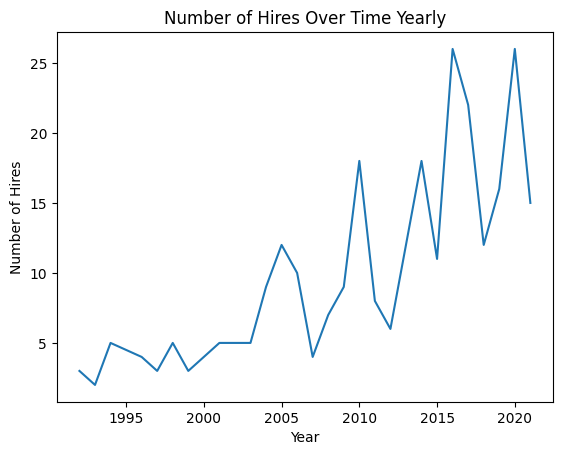

In [45]:
hire=itDF.groupby(itDF['Hire Date'].dt.year).size()
hire.plot(kind="line")
plt.title('Number of Hires Over Time Yearly')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.show()

In [46]:
itDF[itDF["Annual Salary"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
39,E03131,Ezekiel Reed,Sr. Manager,IT,Manufacturing,Male,Caucasian,37.000000,NaT,NaN,NaN,NaN,NaN,2021-05-01 00:00:00,9,14,Master's,2
48,E02855,Piper Cheng,Enterprise Architect,IT,Manufacturing,Female,Unknown,43.285714,NaT,NaN,NaN,United States,Miami,NaN,9,9,Bachelor's,3
49,E00816,Skylar Watson,Network Architect,IT,Speciality Products,Female,Unknown,44.500000,NaT,NaN,NaN,United States,Phoenix,NaN,9,10,Bachelor's,0


In [47]:
mask=(itDF["Job Title"]=="Sr. Manager")&(itDF["Business Unit"]=="Manufacturing")
itDF.loc[mask, "Annual Salary"]=itDF.loc[mask, "Annual Salary"].fillna(itDF["Annual Salary"].mean())

In [48]:
mask=(itDF["Job Title"]=="Enterprise Architect")&(itDF["Business Unit"]=="Manufacturing")
itDF.loc[mask, "Annual Salary"]=itDF.loc[mask, "Annual Salary"].fillna(itDF["Annual Salary"].mean())

In [49]:
mask=(itDF["Job Title"]=="Network Architect")&(itDF["Business Unit"]=="Speciality Products")
itDF.loc[mask, "Annual Salary"]=itDF.loc[mask, "Annual Salary"].fillna(itDF["Annual Salary"].mean())

In [50]:
itDF[itDF["Annual Salary"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned


In [51]:
itDF.isna().sum()

,0
EEID,0
Full Name,0
Job Title,0
Department,0
Business Unit,0
Gender,0
Ethnicity,0
Age,0
Hire Date,3
Annual Salary,0


In [52]:
itDF["Bonus %"].describe()

,Bonus %
count,285.000000
mean,0.126596
std,0.790348
min,0.000000
25%,0.000000
50%,0.000000
75%,0.090000
max,12.000000


In [53]:
#Check for outliers
q1=itDF["Bonus %"].quantile(0.25)
q3=itDF["Bonus %"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower, upper)

-0.135 0.225


In [54]:
itDF["Bonus %"].fillna(0, inplace=True)

/tmp/ipython-input-54-3908608968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  itDF["Bonus %"].fillna(0, inplace=True)


In [55]:
itDF["Bonus %"].isna().sum()

np.int64(0)

In [56]:
exitDF=pd.read_csv("Employee_Exit.csv")

In [57]:
exitDF.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E65246,Sarah Moses,Technical Architect,Finance,Customer Support,Female,Black,56,06/18/2008,"$96,729",15%,India,Bangalore,01/03/2013
1,E42782,Eric Smith,Engineer,Finance,Manufacturing,Female,Caucasian,46,11/24/2013,"$98,803",20%,China,Chongqing,01/04/2022
2,E25474,Kathryn Clark,Director,Finance,Sales,Female,Hispanic,27,03/04/2004,"$141,682",10%,Canada,Toronto,04/19/2012
3,E14123,Danielle Hill,Engineer,Marketing,Customer Support,Female,Hispanic,52,01/23/1994,"$184,311",0%,Germany,Berlin,06/28/2003
4,E47811,Kristi Davis,Engineer,Marketing,Research & Development,Male,Caucasian,52,07/09/1996,"$89,195",15%,United States,Chicago,08/21/2004


In [58]:
exitDF.isna().sum()

,0
EEID,0
Full Name,0
Job Title,0
Department,0
Business Unit,0
Gender,0
Ethnicity,0
Age,0
Hire Date,0
Annual Salary,0


In [59]:
exitDF["Exit Date"]=pd.to_datetime(exitDF["Exit Date"], format='mixed')
exitDF["Hire Date"]=pd.to_datetime(exitDF["Hire Date"], format='mixed')

In [60]:
exitDF["Age"].describe()

,Age
count,2000.000000
mean,43.751000
std,12.604699
min,22.000000
25%,33.000000
50%,44.000000
75%,55.000000
max,65.000000


In [61]:
exitDF['Days Worked']=(exitDF['Exit Date']-exitDF['Hire Date'])

In [62]:
exitDF['Days Worked'].describe()

,Days Worked
count,2000
mean,1838 days 02:40:33.600000
std,976 days 14:59:12.098871424
min,365 days 00:00:00
25%,955 days 12:00:00
50%,1755 days 12:00:00
75%,2666 days 06:00:00
max,3649 days 00:00:00


In [63]:
for col in exitDF.columns:
  print(col, type(exitDF[col][0]))

EEID <class 'str'>
Full Name <class 'str'>
Job Title <class 'str'>
Department <class 'str'>
Business Unit <class 'str'>
Gender <class 'str'>
Ethnicity <class 'str'>
Age <class 'numpy.int64'>
Hire Date <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Annual Salary <class 'str'>
Bonus % <class 'str'>
Country <class 'str'>
City <class 'str'>
Exit Date <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Days Worked <class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [64]:
exitDF['Annual Salary']=exitDF['Annual Salary'].replace(r'[\$,]','', regex=True).astype(float)
exitDF['Bonus %']=exitDF['Bonus %'].replace(r'[%]','', regex=True).astype(float)

In [65]:
for col in exitDF.columns:
  print(col, type(exitDF[col][0]))

EEID <class 'str'>
Full Name <class 'str'>
Job Title <class 'str'>
Department <class 'str'>
Business Unit <class 'str'>
Gender <class 'str'>
Ethnicity <class 'str'>
Age <class 'numpy.int64'>
Hire Date <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Annual Salary <class 'numpy.float64'>
Bonus % <class 'numpy.float64'>
Country <class 'str'>
City <class 'str'>
Exit Date <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Days Worked <class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [66]:
exitDF.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Days Worked
0,E65246,Sarah Moses,Technical Architect,Finance,Customer Support,Female,Black,56,2008-06-18,96729.0,15.0,India,Bangalore,2013-01-03,1660 days
1,E42782,Eric Smith,Engineer,Finance,Manufacturing,Female,Caucasian,46,2013-11-24,98803.0,20.0,China,Chongqing,2022-01-04,2963 days
2,E25474,Kathryn Clark,Director,Finance,Sales,Female,Hispanic,27,2004-03-04,141682.0,10.0,Canada,Toronto,2012-04-19,2968 days
3,E14123,Danielle Hill,Engineer,Marketing,Customer Support,Female,Hispanic,52,1994-01-23,184311.0,0.0,Germany,Berlin,2003-06-28,3443 days
4,E47811,Kristi Davis,Engineer,Marketing,Research & Development,Male,Caucasian,52,1996-07-09,89195.0,15.0,United States,Chicago,2004-08-21,2965 days


In [67]:
itDF.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,United States,Seattle,2021-10-16 00:00:00,5,2,Master's,2
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29,99975.0,0.00,China,Chongqing,NaN,10,8,Bachelor's,2
2,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27,84913.0,0.07,United States,Chicago,NaN,8,3,Bachelor's,2
3,E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27.0,2020-07-01,119746.0,0.10,United States,Phoenix,NaN,7,13,Master's,0
4,E04116,David Barnes,Vice President,IT,Corporate,Male,Caucasian,64.0,2013-11-03,186503.0,0.24,United States,Columbus,NaN,8,8,Bachelor's,2


In [68]:
employeeprofileDF.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08 00:00:00,141604.0,0.15,United States,Seattle,2021-10-16 00:00:00,5,2,Master's,2
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29 00:00:00,99975.0,0.00,China,Chongqing,None,10,8,Bachelor's,2
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26 00:00:00,163099.0,0.20,United States,Chicago,None,5,4,Bachelor's,2
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27 00:00:00,84913.0,0.07,United States,Chicago,None,8,3,Bachelor's,2
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20 00:00:00,95409.0,0.00,United States,Phoenix,None,5,12,Bachelor's,0


In [69]:
employeeprofileDF=employeeprofileDF.dropna(subset=['Exit Date'])

In [70]:
employeeprofileDF["Exit Date"]=pd.to_datetime(employeeprofileDF["Exit Date"], format='mixed')
employeeprofileDF["Hire Date"]=pd.to_datetime(employeeprofileDF["Hire Date"], format='mixed')

/tmp/ipython-input-70-1238976748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employeeprofileDF["Exit Date"]=pd.to_datetime(employeeprofileDF["Exit Date"], format='mixed')
/tmp/ipython-input-70-1238976748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employeeprofileDF["Hire Date"]=pd.to_datetime(employeeprofileDF["Hire Date"], format='mixed')


In [71]:
employeeprofileDF['Days Worked']=(employeeprofileDF['Exit Date']-employeeprofileDF['Hire Date']).dt.days

In [72]:
for col in employeeprofileDF.columns:
  print(col, type(employeeprofileDF[col][0]))

EEID <class 'str'>
Full Name <class 'str'>
Job Title <class 'str'>
Department <class 'str'>
Business Unit <class 'str'>
Gender <class 'str'>
Ethnicity <class 'str'>
Age <class 'numpy.float64'>
Hire Date <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Annual Salary <class 'numpy.float64'>
Bonus % <class 'numpy.float64'>
Country <class 'str'>
City <class 'str'>
Exit Date <class 'pandas._libs.tslibs.timestamps.Timestamp'>
EmploymentRating <class 'numpy.int64'>
DaysOfAbsence <class 'numpy.int64'>
EducationLevel <class 'str'>
CertificationsEarned <class 'numpy.int64'>
Days Worked <class 'numpy.float64'>


In [73]:
employeeprofileDF.dropna()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned,Days Worked
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,United States,Seattle,2021-10-16,5,2,Master's,2,2017.0
8,E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25.0,2020-05-16,41336.0,0.00,United States,Miami,2021-05-20,7,2,Bachelor's,2,369.0
9,E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25.0,2020-05-16,41336.0,0.00,United States,Miami,2021-05-20,9,2,Bachelor's,3,369.0
17,E03496,Robert Yang,Sr. Analyst,Accounting,Speciality Products,Male,Asian,31.0,2017-11-04,97078.0,0.00,United States,Austin,2020-03-09,10,15,Bachelor's,2,856.0
46,E01754,Owen Lam,Sr. Business Partner,Human Resources,Speciality Products,Male,Asian,30.0,2017-05-29,86317.0,0.00,China,Chengdu,2017-07-16,10,11,Master's,2,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,E03247,Aaliyah Mai,Vice President,IT,Speciality Products,Female,Asian,57.0,2016-11-11,246589.0,0.33,United States,Phoenix,2017-03-26,7,16,Bachelor's,0,135.0
1169,E03247,Aaliyah Mai,Vice President,IT,Speciality Products,Female,Asian,57.0,2016-11-11,246589.0,0.33,United States,Phoenix,2017-03-26,10,10,Bachelor's,0,135.0
1170,E02703,Austin Vang,Manager,Marketing,Speciality Products,Male,Asian,49.0,2018-05-20,119397.0,0.09,China,Beijing,2019-03-14,5,6,PhD,1,298.0
1180,E03430,Leo Herrera,Sr. Business Partner,Human Resources,Research & Development,Male,Latino,48.0,1998-04-22,85369.0,0.00,Brazil,Manaus,2004-11-27,9,8,Master's,2,2411.0


## MODELS

In [74]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [75]:
exitDF.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date,Days Worked
count,2000.000000,2000,2000.000000,2000.000000,2000,2000
mean,43.751000,2007-04-07 13:27:50.400000,126745.038500,9.940000,2012-04-18 16:08:24,1838 days 02:40:33.600000
min,22.000000,1990-01-12 00:00:00,50034.000000,0.000000,1992-08-17 00:00:00,365 days 00:00:00
25%,33.000000,1998-07-14 00:00:00,89449.750000,5.000000,2004-06-12 18:00:00,955 days 12:00:00
50%,44.000000,2007-07-07 12:00:00,127423.500000,10.000000,2012-10-09 00:00:00,1755 days 12:00:00
75%,55.000000,2015-11-26 00:00:00,165781.500000,15.000000,2021-04-27 06:00:00,2666 days 06:00:00
max,65.000000,2024-06-19 00:00:00,199760.000000,20.000000,2025-06-28 00:00:00,3649 days 00:00:00
std,12.604699,NaN,43444.901616,7.037127,NaN,976 days 14:59:12.098871424


In [76]:
exitDF['Days Worked'].describe()

,Days Worked
count,2000
mean,1838 days 02:40:33.600000
std,976 days 14:59:12.098871424
min,365 days 00:00:00
25%,955 days 12:00:00
50%,1755 days 12:00:00
75%,2666 days 06:00:00
max,3649 days 00:00:00


In [77]:
q1=exitDF['Days Worked'].quantile(0.25)
q3=exitDF['Days Worked'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5 *iqr
upper=q3+1.5*iqr
cond1=exitDF['Days Worked']>lower
cond2=exitDF['Days Worked']<upper
outliers=exitDF[(cond1&cond2)]
print(len(outliers))

2000


In [78]:
exitDF.columns

Index(['EEID', 'Full Name', 'Job Title', 'Department', 'Business Unit',
       'Gender', 'Ethnicity', 'Age', 'Hire Date', 'Annual Salary', 'Bonus %',
       'Country', 'City', 'Exit Date', 'Days Worked'],
      dtype='object')

In [89]:
exitDF[exitDF['Days Worked'].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Days Worked


In [90]:
X1=exitDF[['Age', 'Annual Salary', 'Bonus %']]
y=exitDF['Days Worked']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [92]:
model1=LinearRegression()
model1.fit(X_train, y_train)
y_pred=model1.predict(X_test)

In [83]:
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE =", mae)
print("RMSE =", rmse)

MAE = 7.494387964537965e+16
RMSE = 8.58657724220275e+16


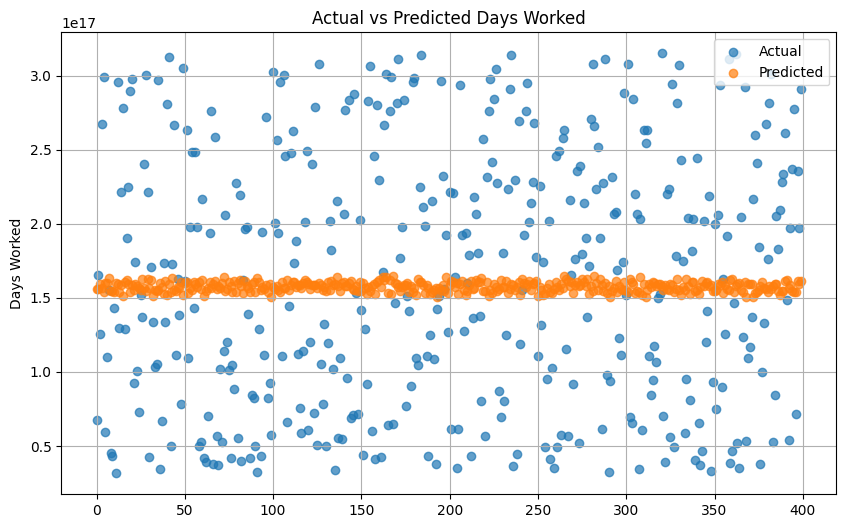

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Days Worked')
plt.ylabel('Days Worked')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
#Trying with different features

In [100]:
employeeprofileDF.isna().sum()
employeeprofileDF.drop(columns=['Country', 'City'])

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned,Days Worked
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,2021-10-16,5,2,Master's,2,2017.0
8,E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25.0,2020-05-16,41336.0,0.00,2021-05-20,7,2,Bachelor's,2,369.0
9,E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25.0,2020-05-16,41336.0,0.00,2021-05-20,9,2,Bachelor's,3,369.0
17,E03496,Robert Yang,Sr. Analyst,Accounting,Speciality Products,Male,Asian,31.0,2017-11-04,97078.0,0.00,2020-03-09,10,15,Bachelor's,2,856.0
46,E01754,Owen Lam,Sr. Business Partner,Human Resources,Speciality Products,Male,Asian,30.0,2017-05-29,86317.0,0.00,2017-07-16,10,11,Master's,2,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,E03247,Aaliyah Mai,Vice President,IT,Speciality Products,Female,Asian,57.0,2016-11-11,246589.0,0.33,2017-03-26,7,16,Bachelor's,0,135.0
1169,E03247,Aaliyah Mai,Vice President,IT,Speciality Products,Female,Asian,57.0,2016-11-11,246589.0,0.33,2017-03-26,10,10,Bachelor's,0,135.0
1170,E02703,Austin Vang,Manager,Marketing,Speciality Products,Male,Asian,49.0,2018-05-20,119397.0,0.09,2019-03-14,5,6,PhD,1,298.0
1180,E03430,Leo Herrera,Sr. Business Partner,Human Resources,Research & Development,Male,Latino,48.0,1998-04-22,85369.0,0.00,2004-11-27,9,8,Master's,2,2411.0


In [110]:
employeeprofileDF=employeeprofileDF.dropna(subset=['Annual Salary'])

In [111]:
X2=employeeprofileDF[['EmploymentRating', 'Annual Salary', 'Bonus %', 'DaysOfAbsence']]
y=employeeprofileDF['Days Worked']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [113]:
model2=LinearRegression()
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)

In [114]:
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE =", mae)
print("RMSE =", rmse)

MAE = 1203.4823991215494
RMSE = 1354.4869887321731


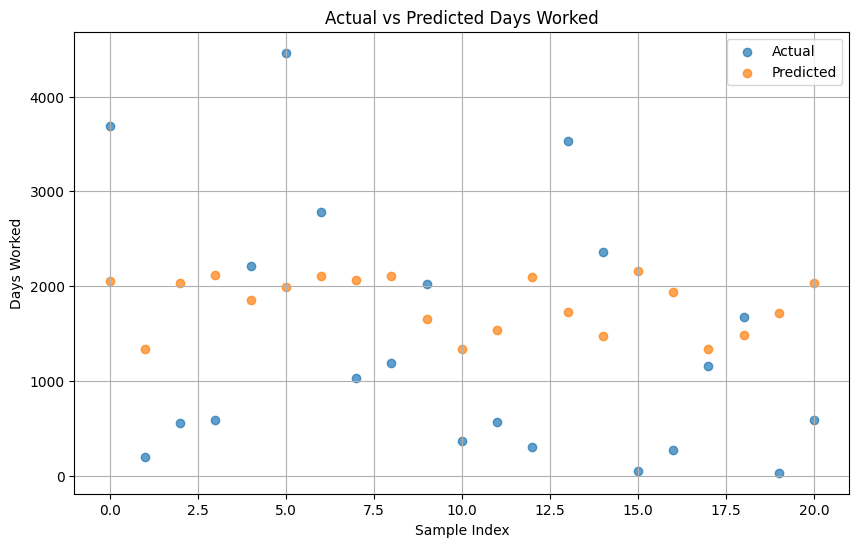

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Days Worked')
plt.xlabel('Sample Index')
plt.ylabel('Days Worked')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
numeric=['Age', 'Annual Salary', 'Bonus %', 'EmploymentRating', 'DaysOfAbsence', 'CertificationsEarned']
categorical=['Job Title', 'Department', 'Business Unit', 'Gender', 'Ethnicity', 'EducationLevel', 'Country', 'City']

In [117]:
preprocessor=ColumnTransformer(transformers=[('num', StandardScaler(), numeric),('cat', OneHotEncoder(handle_unknown='ignore'), categorical)])

In [118]:
model3=Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
X=employeeprofileDF[numeric+categorical]
y=employeeprofileDF['Days Worked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
model3.fit(X_train, y_train)
y_pred=model3.predict(X_test)

In [120]:
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE =", mae)
print("RMSE =", rmse)

MAE = 1628.02303753526
RMSE = 2188.1355054893193


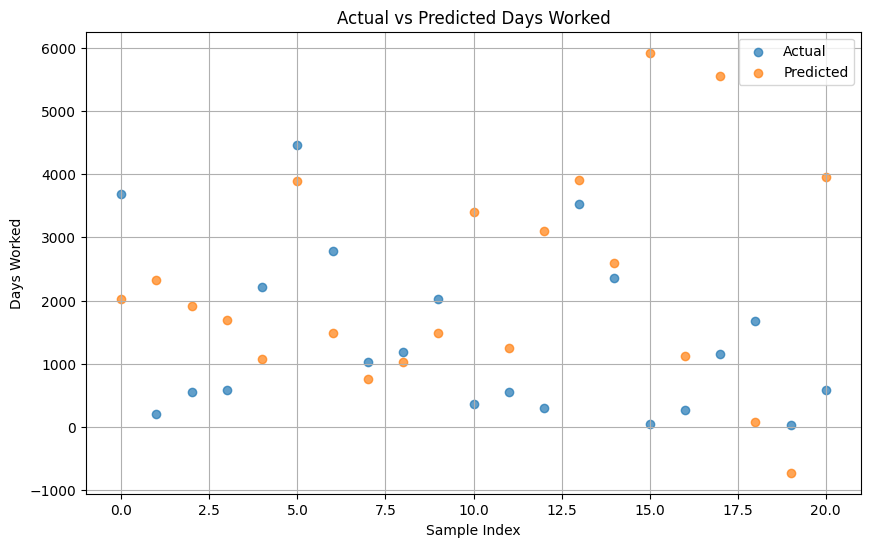

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Days Worked')
plt.xlabel('Sample Index')
plt.ylabel('Days Worked')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
corr=employeeprofileDF[['Age', 'Annual Salary', 'Bonus %', 'EmploymentRating', 'DaysOfAbsence', 'CertificationsEarned', 'Days Worked']].corr()
print(corr['Days Worked'].sort_values(ascending=False))

Days Worked             1.000000
Age                     0.414613
DaysOfAbsence           0.023647
EmploymentRating        0.013353
CertificationsEarned    0.004695
Annual Salary          -0.100395
Bonus %                -0.118407
Name: Days Worked, dtype: float64


In [123]:
#For categorical features
from scipy.stats import f_oneway
categorical_cols = ['Job Title', 'Department', 'Business Unit', 'Gender', 'Ethnicity', 'EducationLevel', 'Country', 'City']
for col in categorical_cols:
    groups = [employeeprofileDF['Days Worked'][employeeprofileDF[col] == cat] for cat in employeeprofileDF[col].dropna().unique()]
    f_val, p_val = f_oneway(*groups)
    print(f"{col}: p-value = {p_val:.4e}")

Job Title: p-value = 2.0635e-02
Department: p-value = 3.3295e-01
Business Unit: p-value = 1.6551e-01
Gender: p-value = 7.9433e-01
Ethnicity: p-value = 5.4432e-01
EducationLevel: p-value = 9.0019e-01
Country: p-value = 7.8882e-01
City: p-value = 8.3248e-02


In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [126]:
numeric2=['Age', 'Annual Salary', 'Bonus %', 'DaysOfAbsence', 'EmploymentRating', 'CertificationsEarned']
categorical2=['Job Title']
X=employeeprofileDF[numeric2+categorical2]
y=employeeprofileDF['Days Worked']
X_train4, X_test4, y_train4, y_test4=train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder(handle_unknown='ignore')

In [128]:
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric2),('cat', categorical_transformer, categorical2)])

In [129]:
model4=Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
model4.fit(X_train4, y_train4)
y_pred4=model4.predict(X_test4)

In [130]:
mae=mean_absolute_error(y_test4, y_pred4)
rmse=np.sqrt(mean_squared_error(y_test4, y_pred4))
print("MAE =", mae)
print("RMSE =", rmse)

MAE = 1393.7506678652258
RMSE = 1735.3810971144733


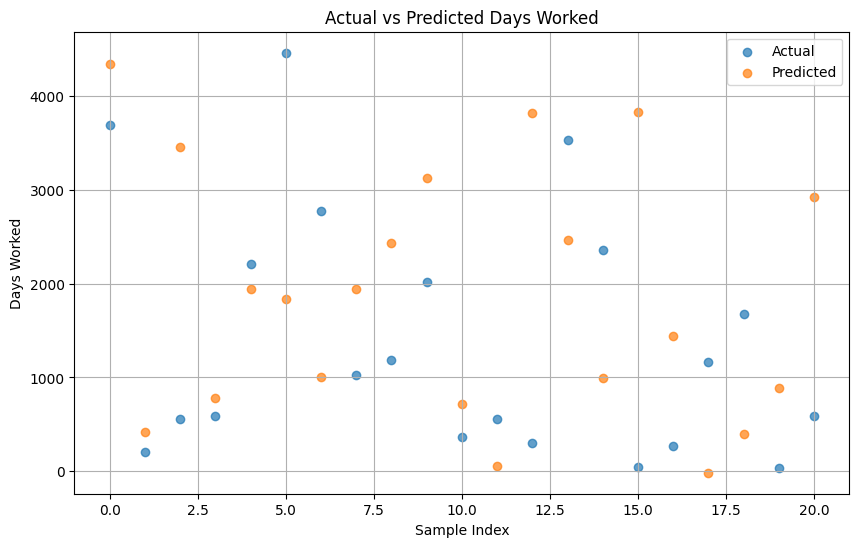

In [131]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test4)), y_test4, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred4)), y_pred4, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Days Worked')
plt.xlabel('Sample Index')
plt.ylabel('Days Worked')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [133]:
numeric=['Age', 'Annual Salary', 'Bonus %', 'DaysOfAbsence', 'EmploymentRating', 'CertificationsEarned']
categorical2=['Job Title']
X=employeeprofileDF[numeric2 + categorical2]
y=employeeprofileDF['Days Worked']

In [134]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder(handle_unknown='ignore')

In [136]:
preprocessor=ColumnTransformer(transformers=[ ('num', numeric_transformer, numeric2), ('cat', categorical_transformer, categorical2)])

In [137]:
X_train_processed=preprocessor.fit_transform(X_train)
X_test_processed=preprocessor.transform(X_test)

In [138]:
NN=Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
NN.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

In [140]:
NN.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - loss: 7605394.0000 - mae: 1986.6613 - val_loss: 2077265.0000 - val_mae: 1043.2791
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 8977312.0000 - mae: 2173.7024 - val_loss: 2073891.7500 - val_mae: 1041.4795
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 7767113.5000 - mae: 1981.9099 - val_loss: 2069160.0000 - val_mae: 1038.9990
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 9292606.0000 - mae: 2164.9243 - val_loss: 2062504.7500 - val_mae: 1035.6084
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 8222581.0000 - mae: 2076.0063 - val_loss: 2053640.0000 - val_mae: 1031.1256
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - loss: 8750265.0000 - mae: 2141.3879 - val_loss: 2042043.0000 - val_mae: 1025.3339
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 8005701.5000 - mae: 2042.7858 - val_loss: 2026874.8750 - val_mae: 1017.8073
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 8721411

In [141]:
y_pred=NN.predict(X_test_processed).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [142]:
y_pred=NN.predict(X_test_processed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [143]:
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE =", mae)
print("RMSE =", rmse)

MAE = 1193.4510091145833
RMSE = 1607.1300655656873


In [144]:
numeric=['Age', 'Annual Salary', 'Bonus %', 'EmploymentRating', 'DaysOfAbsence', 'CertificationsEarned']
categorical=['Job Title', 'Department', 'Business Unit', 'Gender', 'Ethnicity', 'EducationLevel', 'Country', 'City']
features=numeric+categorical

In [145]:
Xit=itDF[features]

In [146]:
XitP=preprocessor.transform(Xit)

In [147]:
predicted_days=NN.predict(XitP).flatten()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


### ML2

In [148]:
employee_performance.head()

,PK,EEID,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,1,E03247,7,16,Bachelor's,0
1,2,E00586,5,16,Master's,1
2,3,E02966,10,16,Bachelor's,1
3,4,E02802,7,16,Bachelor's,2
4,5,E02706,7,16,Master's,2


In [149]:
bonusDF=pd.read_csv("Performance_Bonus.csv")

In [150]:
bonusDF['Bouns']=bonusDF['Bouns'].replace(r'[%]','', regex=True).astype(float)

In [151]:
bonusDF.isna().sum()

,0
PerformanceID,0
EmploymentRating,0
DaysOfAbsence,0
EducationLevel,0
CertificationsEarned,0
Bouns,0


In [152]:
numericccc=['EmploymentRating', 'DaysOfAbsence', 'CertificationsEarned']
categoricallll=['EducationLevel']
X=bonusDF[numericccc+categoricallll]
y=bonusDF['Bouns']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
Ntransformer=StandardScaler()
Ctransformer=OneHotEncoder(handle_unknown='ignore')

In [154]:
preprocessor = ColumnTransformer(transformers=[('num', Ntransformer, numericccc),('cat', Ctransformer, categoricallll)])

In [155]:
modelll=Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
modelll.fit(X_train, y_train)
y_pred=modelll.predict(X_test)

In [156]:
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE =", mae)
print("RMSE =", rmse)

MAE = 10.544779134671224
RMSE = 12.122877556720914


In [157]:
b=employeeprofileDF[numericccc+categoricallll].copy()

In [158]:
predictedbonus=modelll.predict(b)

In [159]:
employeeprofileDF['Predicted_bonus']=predictedbonus

In [160]:
underRewarded=(employeeprofileDF['Bonus %']<employeeprofileDF['Predicted_bonus']).sum()

In [161]:
underRewarded

np.int64(105)